# Cargando las librerias requeridas

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
from sklearn import datasets
iris = datasets.load_iris() #Cargando el dataset de iris
print(iris.keys()) #Analizando las variables que tiene

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Gaussian Mixture Model

Para el algoritmo de GMM se utiliza la clase sklearn.mixture.GaussianMixture<br>
GaussianMixture(n_components=1, covariance_type='full', tol=0.001, max_iter=100, n_init=1, init_params='kmeans')<br><br>
Parámetros
* n_components: Número de componentes/clusters a ajustar.
* covariance_type: Forma de la covarianza en los datos.<br>
full: cada componente tiene su propia matriz de covarianza.<br>
tied: todos los componente comparten la misma matriz de covarianza.<br>
diag: cada componente tiene su propia matriz de covarianza diagonal.<br>
spherical: cada componente tiene su propio valor de varianza (covarianza diagonal y mismo valor).
* tol: límite de convergencia, si una iteración disminuye menos que este valor, el algoritmo finaliza.
* max_iter: número máximo de iteraciones.
* n_init: número de veces que se aplica el algoritmo (se queda con el mejor).
* init_params: forma de inicializar los parámetros (“kmeans”, “random”).<br><br>

Atributos
* weights_: pesos de cada componente para todos los datos ($\pi$).
* means_: promedio de cada componente ($\mu$).
* covariances_: matriz de covarianza de cada componente ($\Sigma$).
* n_iter_int: número de iteraciones del algoritmo.
* lower_bound: mejor log-likelihood encontrado.<br><br>

Funciones
* aic(X): Akaike information criteria de los datos X.
* bic(X): Bayesian information criteria de los datos X.
* predict_proba(X): predicción de probabilidad de los datos X.
* score(X): log-likelihood promedio de los datos X.
* fit(X), fit_predict(X), predict(X).<br><br>


In [3]:
#Creando un objeto de GMM con las condiciones iniciales
from sklearn.mixture import GaussianMixture
numK=2
GMM = GaussianMixture(n_components=numK, covariance_type="full")
#full: cada componente tiene su propia matriz de covarianza.
#tied: todos los componente comparten la misma matriz de covarianza.
#diag: cada componente tiene su propia matriz de covarianza diagonal.
#spherical: cada componente tiene su propio valor de varianza (covarianza diagonal y mismo valor).

#Entrenando el modelo
GMM = GMM.fit(iris.data)

#Mostrando los parametros aprendidos
print("Porcentajes de datos \"modelado\" por cada componente (\pi_k)",GMM.weights_,"\n")
print("Medias (\mu_k):\n",GMM.means_,"\n")
print("Matrices de covarianza (\Sigma_k):\n",GMM.covariances_,)



Porcentajes de datos "modelado" por cada componente (\pi_k) [0.33332911 0.66667089] 

Medias (\mu_k):
 [[5.00600639 3.4280142  1.46200203 0.24599932]
 [6.26198886 2.87199642 4.90597719 1.67599129]] 

Matrices de covarianza (\Sigma_k):
 [[[0.12176331 0.09722605 0.01602717 0.01012447]
  [0.09722605 0.14080279 0.01146185 0.00911288]
  [0.01602717 0.01146185 0.02955704 0.00594818]
  [0.01012447 0.00911288 0.00594818 0.0108851 ]]

 [[0.43497387 0.12094155 0.44886533 0.16550229]
  [0.12094155 0.10961836 0.14138002 0.07923243]
  [0.44886533 0.14138002 0.67484296 0.2858736 ]
  [0.16550229 0.07923243 0.2858736  0.17863587]]]


Probabilidades de cada punto
 [[1.00000000e+00 2.18043998e-11]
 [9.99999922e-01 7.81327712e-08]
 [9.99999995e-01 4.90263308e-09]
 [9.99999867e-01 1.32940646e-07]
 [1.00000000e+00 6.91148058e-12]]
Asignacion de clusters:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


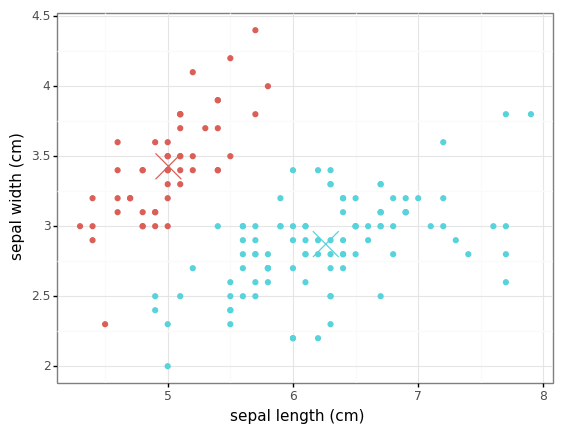

<ggplot: (329689926)>

In [4]:
#Asignando los datos a clusters
predicciones=GMM.predict_proba(iris.data)
print("Probabilidades de cada punto\n",predicciones[0:5,:])

#Asignando cada punto a un cluster
clusters= np.argmax(predicciones, axis=1)
print("Asignacion de clusters:\n",clusters)

#Visualizando en forma directa
tempData = pd.DataFrame(iris.data,columns=iris.feature_names)
tempData["labels"]=clusters
tempData2=pd.DataFrame(GMM.means_,columns=iris.feature_names)
tempData2["labels"]=range(numK)
(ggplot()+aes(x="sepal length (cm)",y="sepal width (cm)",color="factor(labels)")+theme_bw()+
    geom_point(data=tempData,show_legend = False)+
    geom_point(data=tempData2,show_legend = False,shape='x',size=10) 
)

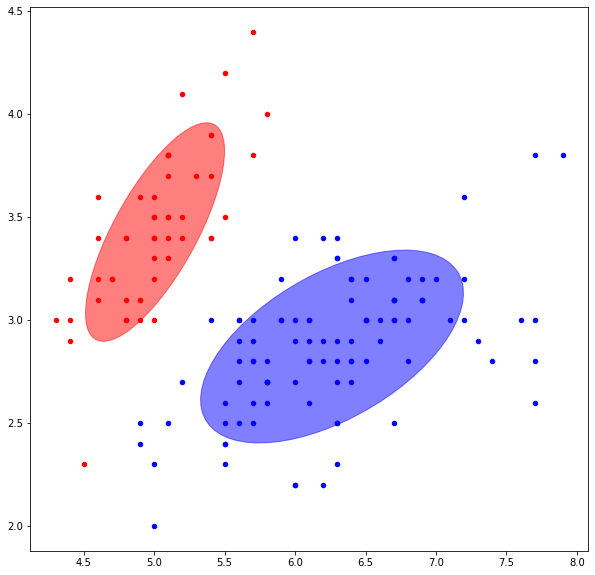

In [6]:
#Visualizando la distribuciones aprendidas
import matplotlib.pyplot as plt
import matplotlib as mpl
numComponents=2
GMM = GaussianMixture(n_components=numComponents, covariance_type='full')
GMM.fit(iris.data)
predicciones=GMM.predict_proba(iris.data)
clusters= np.argmax(predicciones, axis=1)
#full: cada componente tiene su propia matriz de covarianza.<br>
#tied: todos los componente comparten la misma matriz de covarianza.<br>
#diag: cada componente tiene su propia matriz de covarianza diagonal.<br>
#spherical: cada componente tiene su propio valor de varianza.

colors = ['red', 'blue', 'green','cyan']
def make_ellipses(gmm, ax):
    #for n, color in enumerate(colors):
    for n in range(numComponents):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=colors[n])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        #ax.set_aspect('equal', 'datalim')

plt.figure(figsize=(10, 10))
h = plt.subplot(1,1,1)
make_ellipses(GMM, h)
#for n, color in enumerate(colors):
for i in range(numComponents):    
    data = iris.data[clusters == i]
    plt.scatter(data[:, 0], data[:, 1], s=20, color=colors[i])
plt.show()


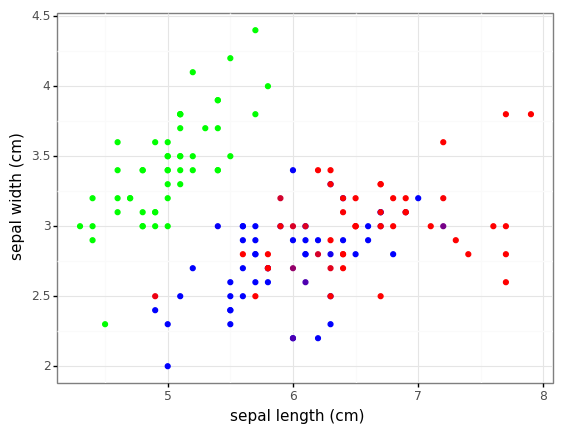

<ggplot: (332015728)>

In [7]:
#Visualizando según los colores
#Obteniendo 3 clusters
numComponents=3
GMM = GaussianMixture(n_components=numComponents, covariance_type='tied')
GMM.fit(iris.data)
predicciones=GMM.predict_proba(iris.data)
clusters= np.argmax(predicciones, axis=1)
#full: cada componente tiene su propia matriz de covarianza.<br>
#tied: todos los componente comparten la misma matriz de covarianza.<br>
#diag: cada componente tiene su propia matriz de covarianza diagonal.<br>
#spherical: cada componente tiene su propio valor de varianza.

#Creando el dataframe para graficar (caso especial de colores)
tempData = pd.DataFrame(iris.data,columns=iris.feature_names)
tempData["labels"]=clusters
tempData.insert(5, "colorPoint","")
for i in range(tempData.shape[0]):
    output=(((predicciones[i,:])*255).astype("int"))
    tempData.iloc[i,5]='#%02x%02x%02x' % (output[0],output[1],output[2])

#Generating the plot with ggplot/plotnine
(ggplot(tempData)+aes(x="sepal length (cm)",y="sepal width (cm)")+theme_bw()+
   geom_point(show_legend = False,color=tempData.colorPoint)
)



            BIC         AIC       type  numK
0    574.017833  486.709409       full   2.0
1    688.097220  630.895150       tied   2.0
2    857.551494  806.370694       diag   2.0
3   1012.235180  979.118192  spherical   2.0
4    580.859425  448.391472       full   3.0
..          ...         ...        ...   ...
67   803.172797  481.034820  spherical  18.0
68  1134.191322  279.170899       full  19.0
69   779.231517  466.125446       tied  19.0
70   941.788365  429.980365       diag  19.0
71   783.075482  442.873693  spherical  19.0

[72 rows x 4 columns]


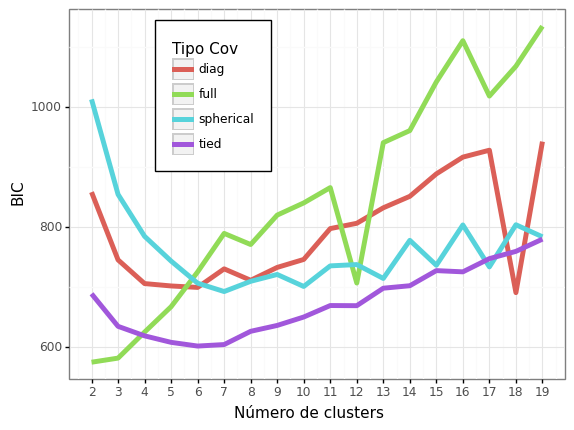

<ggplot: (332002365)>

In [8]:
#Buscando el valor de K, usando AIC O BIC
maxNum=20
allValues=pd.DataFrame(np.zeros(((maxNum-2)*4,4)), columns=["BIC","AIC","type","numK"])
count=0
for k in range(2, maxNum):
    for j in ["full","tied","diag","spherical"]:
        GMM = GaussianMixture(n_components=k, covariance_type=j,n_init=2)
        GMM.fit(iris.data)
        allValues.iloc[count,0]=GMM.bic(iris.data)        
        allValues.iloc[count,1]=GMM.aic(iris.data)
        allValues.iloc[count,2]=j
        allValues.iloc[count,3]=k
        count+=1

print(allValues)
        
graficar="BIC"
(ggplot(allValues)+aes(x="numK",y=graficar,color="type")
 +theme_bw()+geom_line(size=2)+labs(x="Número de clusters",y=graficar)
 +scale_x_continuous(breaks=range(2,maxNum))
 +labs(color="Tipo Cov")
 +theme(legend_position=(0.35,0.7),legend_background=element_rect(color="black"))
)


# Wine dataset

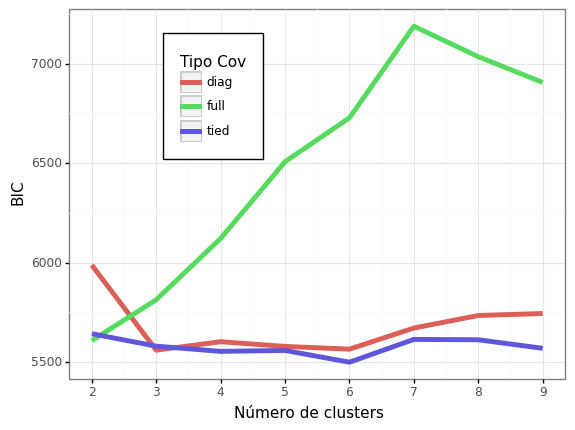

<ggplot: (332066434)>

In [9]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
wine = datasets.load_wine()

#Preprocesamiento, escalamiento y aplicación del modelo
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.data) #Transformamos los datos
dataModel=scaled_features
#dataModel=wine.data

#Buscando el valor de K, usando AIC O BIC
maxNum=10
allValues=pd.DataFrame(np.zeros(((maxNum-2)*3,4)), columns=["BIC","AIC","type","numK"])
count=0
for k in range(2, maxNum):
    for j in ["full","tied","diag"]:
        GMM = GaussianMixture(n_components=k, covariance_type=j,n_init=1)
        GMM.fit(dataModel)
        allValues.iloc[count,0]=GMM.bic(dataModel)        
        allValues.iloc[count,1]=GMM.aic(dataModel)
        allValues.iloc[count,2]=j
        allValues.iloc[count,3]=k
        count+=1

graficar="BIC"
(ggplot(allValues)+aes(x="numK",y=graficar,color="type")
 +theme_bw()+geom_line(size=2)+labs(x="Número de clusters",y=graficar)
 +scale_x_continuous(breaks=range(2,maxNum))
 +labs(color="Tipo Cov")
 +theme(legend_position=(0.35,0.7),legend_background=element_rect(color="black"))
)


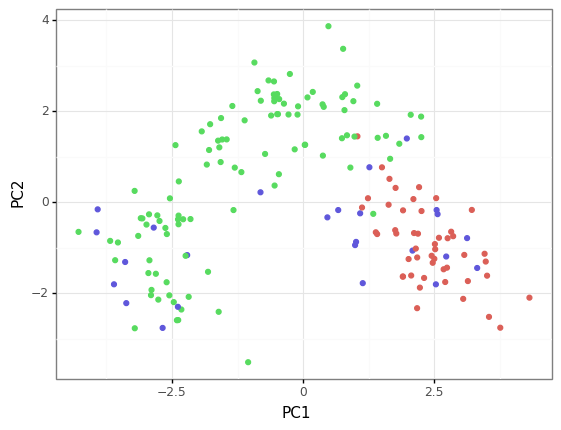

<ggplot: (332147664)>

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Preprocesamiento, escalamiento y aplicación del modelo
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.data) #Transformamos los datos
#dataModel=scaled_features
dataModel=wine.data
GMM = GaussianMixture(n_components=3, covariance_type='full',n_init=10)
GMM.fit(dataModel)
clusters= np.argmax(GMM.predict_proba(dataModel), axis=1)

pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])

tempData["labels"]=clusters
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False)+theme_bw()